# U.S. Medical Insurance Costs

### We are given the task of analyzing a set of variables corresponding to individual (not personally identifying) traits. The variables given are:

* age: age of primary beneficiary (years)

* sex: insurance contractor gender: (female, male)

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents (integer)

* smoker: Smoking (yes, no)

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance (dollars)
### Given these data, ***can we accurately predict insurance costs?***

In [827]:
num_rows_to_print = 5

import csv 
with open('insurance.csv', 'r', newline='') as insurance_data:
    reader = csv.reader(insurance_data)
    for i, row in enumerate(reader):
        print(row)
        if i + 1 == num_rows_to_print:
            break

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
['19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924']
['18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523']
['28', 'male', '33', '3', 'no', 'southeast', '4449.462']
['33', 'male', '22.705', '0', 'no', 'northwest', '21984.47061']


### **The data is very clean and well formatted. We can save the variables in each column as individual lists.**

In [828]:
ages = []
sexes = []
bmis = []
num_of_children = []
smoker_status = []
region = []
ind_charges = []
with open('insurance.csv', 'r', newline='') as insurance_data: 
    reader = csv.reader(insurance_data)
    next(reader)
    for rows in reader: 
        ages.append(rows[0])
        sexes.append(rows[1])
        bmis.append(rows[2])
        num_of_children.append(rows[3])
        smoker_status.append(rows[4])
        region.append(rows[5])
        ind_charges.append(rows[6])
print(ages[0:11])
print(len(ages))

['19', '18', '28', '33', '32', '31', '46', '37', '37', '60', '25']
1338


### Here we saved the columns into individual lists for analysis. We can also see the total number of individuals == 1338. At this point I found someone's ("OUYIMIN19") project on Kaggle, and decided to follow their project process to learn more about the functions they used. So, the rest is not my original work, but I did make some alterations, using a few different visualizations of my own, and learned a lot about Seaborn/Matlab in the process.

In [4]:
import numpy
import pandas
import matplotlib.pyplot as matplot
import seaborn 

In [6]:
#sorting the data using pandas
df = pandas.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [831]:
#let's check the rows/values using pandas. Notice that this corroborates with our earlier print statement. 
df.shape

(1338, 7)

In [832]:
#let's see how clean the data really is 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [833]:
#no missing values. Let's look up some summary statistics 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### pandas allows a much more efficient way of calculating summary statistics than our earlier functions. A cursory look seems to suggest that there are no extreme values. For the categorical variables, we can use a function from pandas to get some intial counts. 

In [834]:
print(df.sex.value_counts(),'\n', df.smoker.value_counts(), '\n', df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### so it appears that sex is roughly evenly distributed, while the majority are non-smokers and each region is represented roughly equally. 

In [835]:
#we can change the categorical variables to numerical values to improve ease of analysis 
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'southeast': 0, 'southwest':1, 'northwest':2, 'northeast':3})
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


## Exploring the Data
### At this point, "OUYIMIN19" started to use functions to visualize the data. First, a histogram of the age variable is developed. This makes use of a function from the seaborn library. 

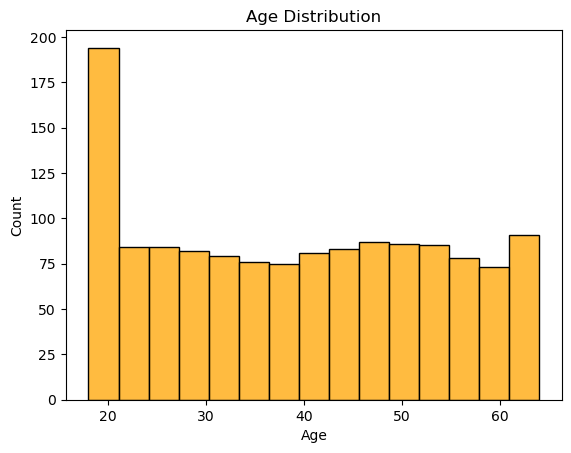

In [836]:
seaborn.histplot(df.age,bins=15, kde=False,color='orange')
matplot.title('Age Distribution')
matplot.xlabel('Age')
matplot.ylabel('Count')
matplot.show()

### so we can see that the age data is roughly uniform with a heavy representation in the lowest bin (looks like roughly 18-22). Considering the count in this range, it could be enough to skew the results.

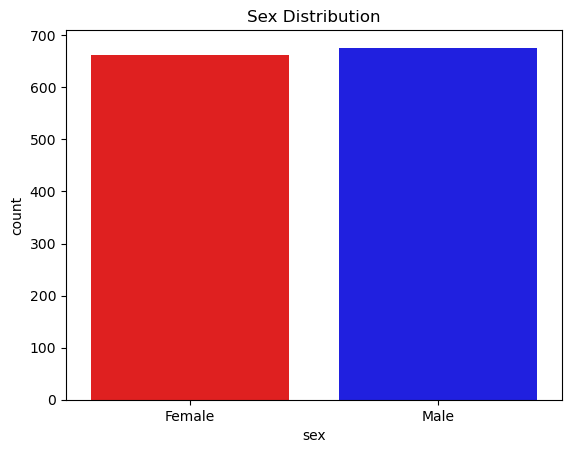

In [837]:
# a simple bar graph could suffice to show the representation among sex (which we already know to be roughly equal from our earlier value_count function)
seaborn.countplot(x = 'sex', data = df, palette = ['red', 'blue'])
matplot.xticks(ticks=[0, 1], labels=['Female', 'Male'])
matplot.title('Sex Distribution')
matplot.show()

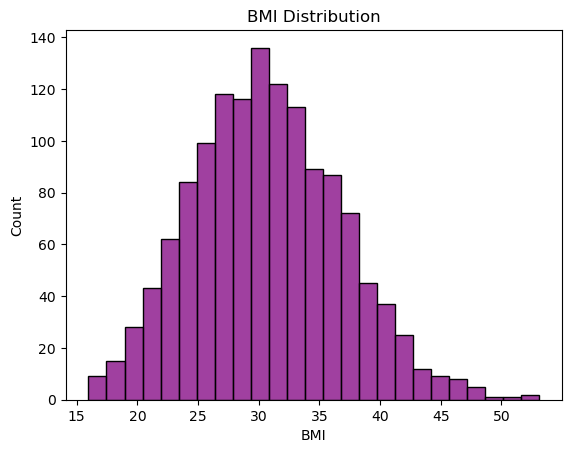

In [838]:
# now we go back to our trusty histogram to visualize the bmi data 
seaborn.histplot(df.bmi,bins=25, kde=False,color='purple')
matplot.title('BMI Distribution')
matplot.xlabel('BMI')
matplot.ylabel('Count')
matplot.show()

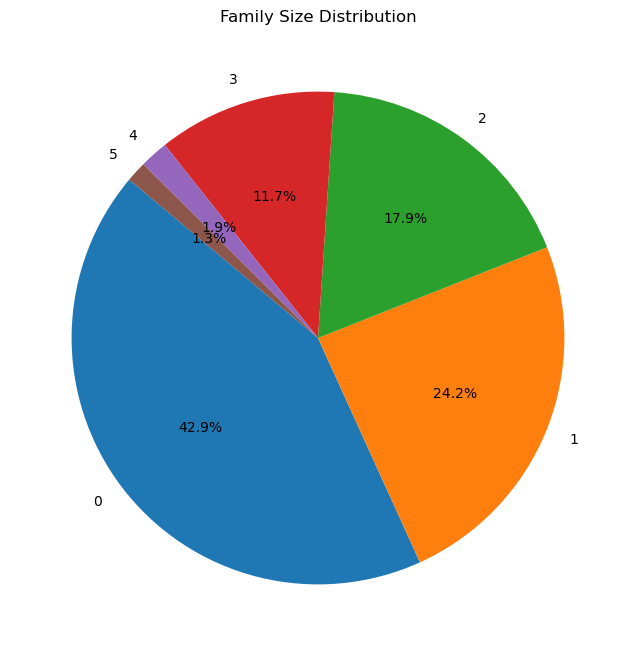

In [839]:
# the data appears approximately normal, with perhaps a slight skew to the right. Now we use a pie chart, since we are bored of bar graphs.


# Calculate counts of categories in the 'Children' Column
children_counts = df['children'].value_counts()

# Create a pie chart
matplot.figure(figsize=(8, 8))  # Optional: Specifies the size of the figure
matplot.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
matplot.title('Family Size Distribution')

# Show the plot
matplot.show()


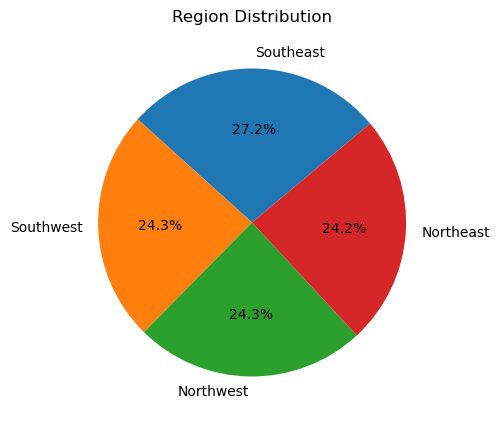

In [840]:
#roughly half of the patients have no children, and very few (about 3.2%) have greater than 3 children. We'll use a similar function to look at regional distribution.
# Calculate counts of categories in the 'Region' Column

#southeast: 0, southwest:1, northwest:2, northeast:3}
new_labels = ['Southeast', 'Southwest', 'Northwest', 'Northeast']
region_counts = df['region'].value_counts()

# Create a pie chart
matplot.figure(figsize=(5, 5))  # Optional: Specifies the size of the figure
matplot.pie(region_counts, labels=new_labels, autopct='%1.1f%%', startangle=40)

# Add a title
matplot.title('Region Distribution')

# Show the plot
matplot.show()

### as we saw previously, the representation is roughly equal from each region. You can see that there is slightly more representation in the "Southeast" region. It was at this point I noticed an error in "OUYIMIN19" analysis. When they documented their index, they used format index = region, which led them to accidentally assign incorrect labels when transferring to the dictionary key:value format. So they incorrectly concluded there was slightly more representation from the Northwest region (when they should have said "Southeast".)


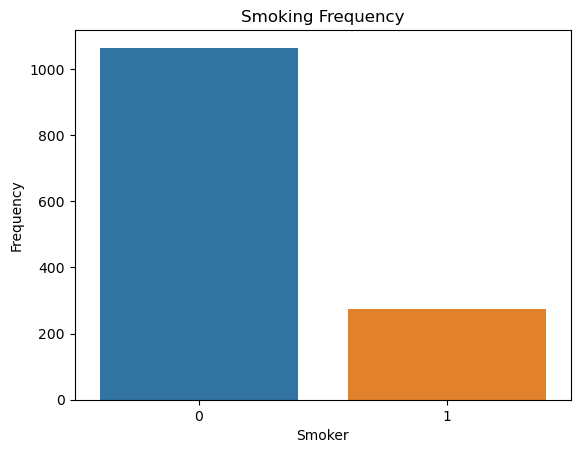

In [841]:
# smoker data 
seaborn.countplot(x = 'smoker', data = df)
matplot.title('Smoking Frequency')
matplot.xlabel('Smoker')
matplot.ylabel('Frequency')
matplot.show()

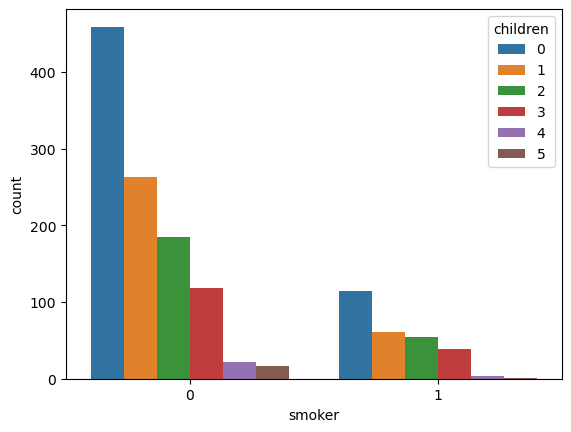

In [842]:
# is there a relationship between smoking and number of children? 
seaborn.countplot(x = df.smoker, hue = df.children)
matplot.show()

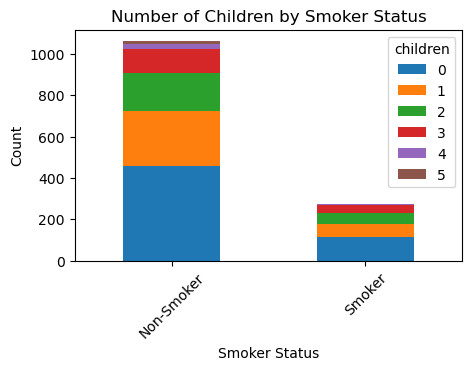

In [843]:
# another way to visualize this using a stacked bar graph

pivot_table = pandas.crosstab(df['smoker'], df['children'])

pivot_table.plot(kind='bar', stacked=True, figsize=(5, 3))

matplot.title('Number of Children by Smoker Status')
matplot.xlabel('Smoker Status')
matplot.ylabel('Count')

tick_labels = ['Non-Smoker', 'Smoker']  # Replace with your labels
matplot.xticks(ticks=range(len(tick_labels)), labels=tick_labels, rotation=45) 
matplot.show()

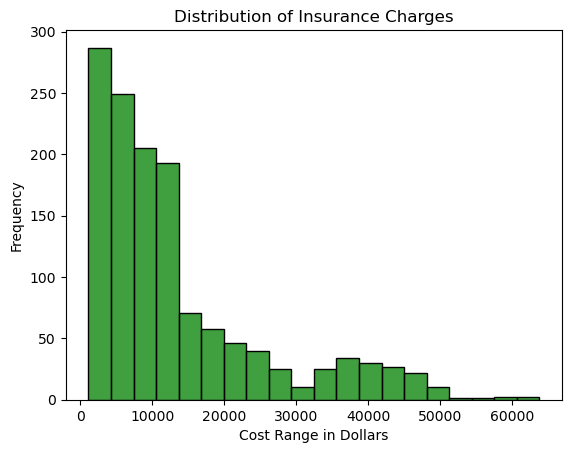

In [844]:
#Finally, a look at the charge distribution. A histogram will suffice. 
seaborn.histplot(df.charges, bins = 20, kde=False, color = 'Green')
matplot.title('Distribution of Insurance Charges')
matplot.ylabel('Frequency')
matplot.xlabel('Cost Range in Dollars')
matplot.show()

### The distribution is skewed right. Visually, the preponderance of the data seems to range from 0-20,000

# Searching for Relationships
### We have visualized the distribution of the insurance cost variables. Now we look for relationships among the data. Apparently the pandas has an amazing function that creates a (linear) correlation matrix for all of the given variables in a csv. Let's use it!

In [845]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


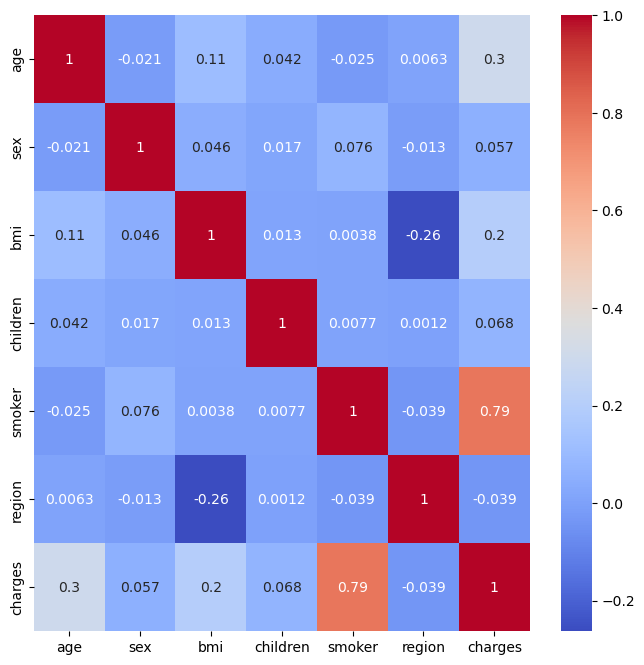

In [846]:
# we can begin to see some relationships. One shortcoming of this function is the lack of it's ability to check for other types of correlation (besides linear). 
matplot.figure(figsize=(8,8))
seaborn.heatmap(df.corr(),annot=True,cmap='coolwarm')
matplot.show()

### the beauty of a heatmap is it makes it easy to see strong relationships between cost and other variables. It appears that the strongest correlation may be between cost and smoking. # of children and age tend to be the next most closely associated with insurance cost. 

/Users/jeremiahwicken/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


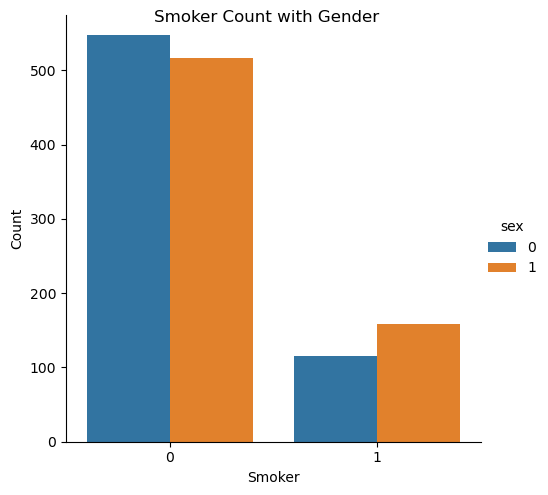

In [847]:
#again using a bar graph to compare categorical variables
g = seaborn.catplot(x="smoker", kind="count", hue='sex', data=df)
g.fig.suptitle('Smoker Count with Gender') 
g.set_axis_labels('Smoker', 'Count')       
matplot.show()

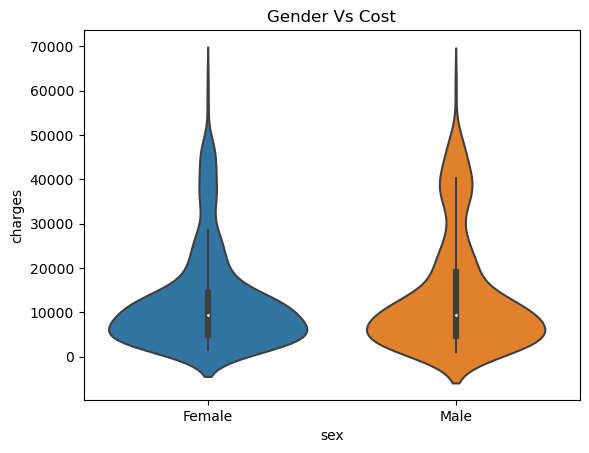

In [848]:
### here is a cool violin plot that compares sex with cost 
seaborn.violinplot(x = 'sex', y = 'charges', data = df)
custom_labels = ['Female', 'Male']  
matplot.xticks(ticks=[0, 1], labels=custom_labels)

matplot.title('Gender Vs Cost')
matplot.show()

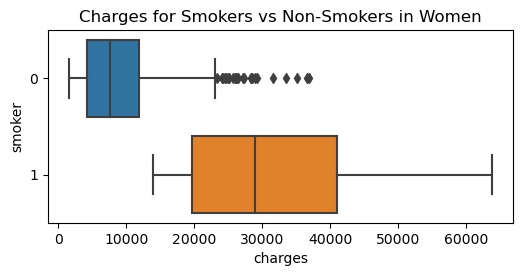

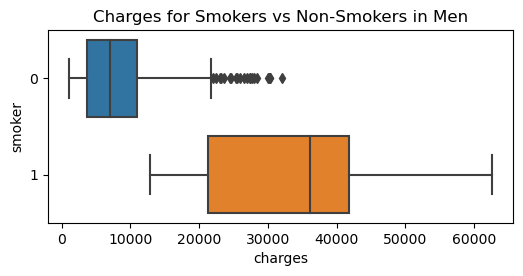

In [849]:
#it appears to be slightly more costly to be male, as expected
matplot.figure(figsize=(6,2.5))
matplot.title("Charges for Smokers vs Non-Smokers in Women")
seaborn.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h")
matplot.figure(figsize=(6,2.5))
matplot.title("Charges for Smokers vs Non-Smokers in Men")
seaborn.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h")
matplot.show()

/Users/jeremiahwicken/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jeremiahwicken/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jeremiahwicken/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


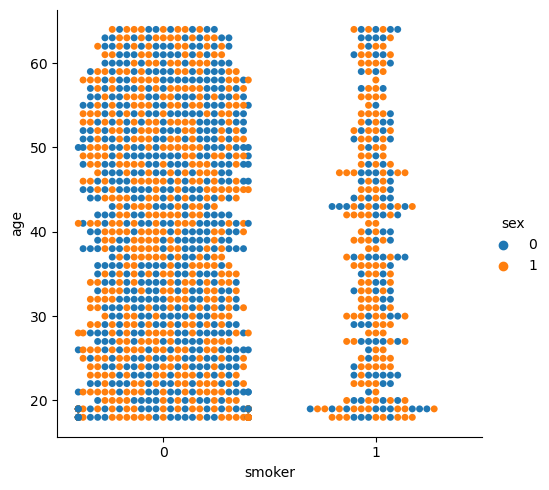

In [850]:
# as predicted with our correlation coefficients, a strong relationship between cost and smoking even when seperated by sex. 
#smoking compared with age 
seaborn.catplot(data=df, x="smoker", y="age", hue="sex", kind="swarm")
matplot.show()

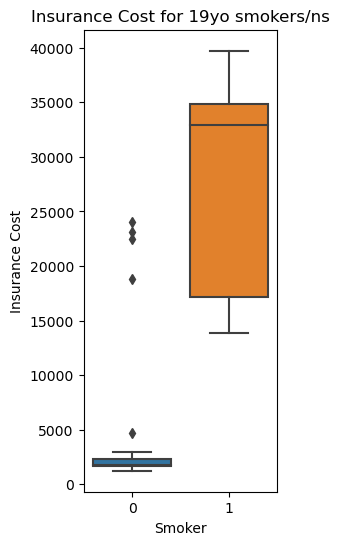

In [851]:
# Smoking = 1. again we see a slightly greater frequency in the younger ages that smoke, and a higher proportion of men.
# for those age 19, what is the relationship between smoking and insurance cost? 
matplot.figure(figsize=(2.5,6))
matplot.title("Insurance Cost for 19yo smokers/ns")
seaborn.boxplot(y="charges", x="smoker", data =  df[(df.age == 19)] , orient="v")
matplot.xlabel('Smoker')
matplot.ylabel('Insurance Cost')
matplot.show()

/Users/jeremiahwicken/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/q7/yfzmx7ls345_lcd735y2ktm40000gn/T/ipykernel_98657/1337890816.py:7: UserWarning: The figure layout has changed to tight
  matplot.tight_layout()


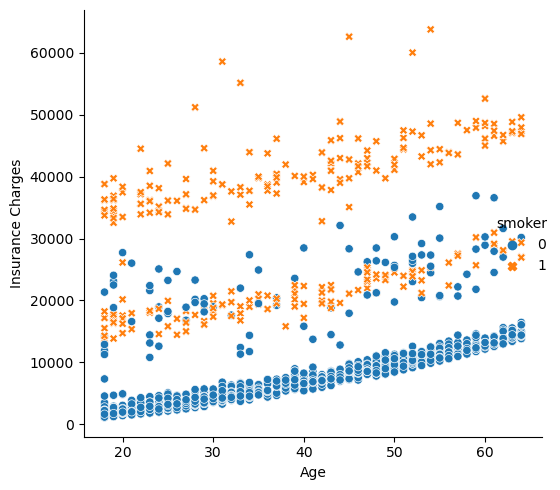

In [852]:
#besides a few outliers, smoking dramatically increases cost in 19yo individuals
#how about the charges for non-smokers across age? 

seaborn.relplot(data=df,x="age", y="charges", hue="smoker", style="smoker")
matplot.xlabel('Age')
matplot.ylabel('Insurance Charges')
matplot.tight_layout()
matplot.show()

/Users/jeremiahwicken/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


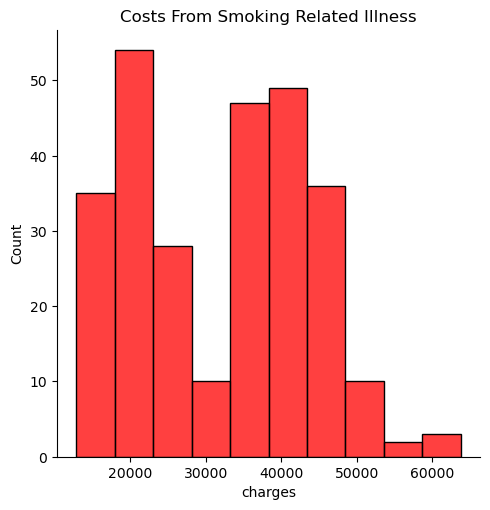

In [853]:
# a clear relationship between age and insurance cost, and interestingly, a bimodal distribution among smokers seems to exist.
# let's zoom in on that
seaborn.displot(data=df[(df.smoker == 1)], x="charges", color = 'red', multiple="dodge")
matplot.title('Costs From Smoking Related Illness')
matplot.show()

In [854]:
#Does a relationship between BMI and insurance cost exist? The graph below seems to suggest as much. 

/Users/jeremiahwicken/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


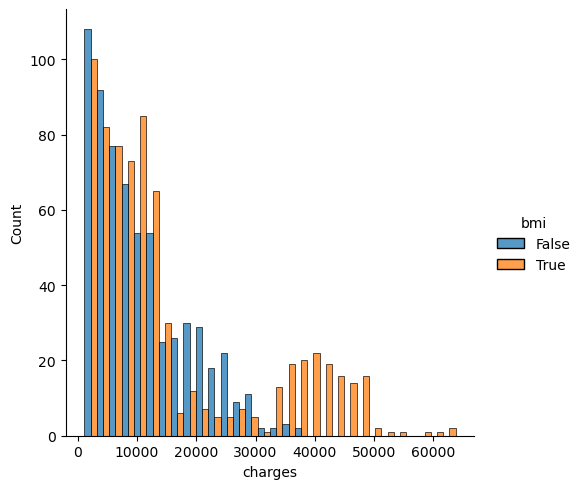

In [855]:
seaborn.displot(data=df, x="charges", hue=df.bmi>=30, multiple="dodge")
matplot.show()

## I really appreciate OUYIMIN19's work. I've learned a lot about data visualization tools by following along. Now, we build a machine learning model to try to make predictions from the data. The Train Test Split!

In [856]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

In [857]:
#we created a training set for the model to learn from, and a testing set to test its predictions. Building a linear model: 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr


LinearRegression()

In [858]:
#model training
lr.fit(x_train,y_train)
#model accuracy
print(lr.score(x_train,y_train))

0.7369902703793605


In [859]:
ly_pred = lr.predict(x_test)

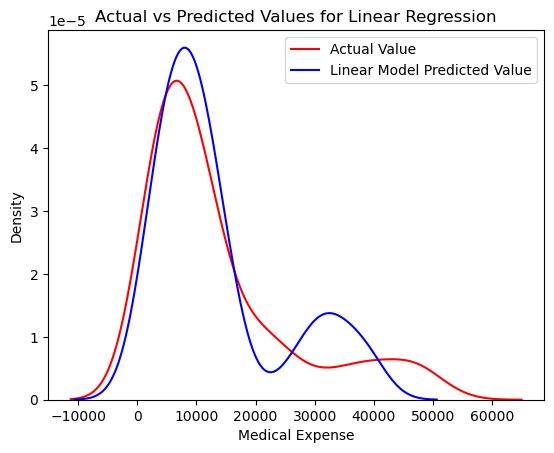

MAE: 3930.8744170009054
MSE: 31858321.107765954
RMSE: 5644.317594516272
R2 Score: 0.799796841255606


In [860]:
# Linear Model 
ax1 = seaborn.kdeplot(y_test, color='r', label='Actual Value')

# Overlay the predicted values on the same plot
seaborn.kdeplot(ly_pred, color='b', label='Linear Model Predicted Value', ax=ax1)

# Adding legends and other plot elements
matplot.title('Actual vs Predicted Values for Linear Regression')
matplot.xlabel('Medical Expense')
matplot.legend()
matplot.show()
print('MAE:', mean_absolute_error(y_test, ly_pred))
print('MSE:', mean_squared_error(y_test, ly_pred))
print('RMSE:', numpy.sqrt(mean_squared_error(y_test, ly_pred)))
print('R2 Score:', r2_score(y_test, ly_pred))

In [861]:
# Building a polynomial model 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) 
poly_reg

PolynomialFeatures()

In [862]:
#transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.2, random_state=0)

In [863]:
plr = LinearRegression()
#model training
plr.fit(x_train,y_train)
#model accuracy
print(plr.score(x_train,y_train))

0.8372221781482931


In [864]:
y_pred = plr.predict(x_test)

In [865]:
# since the polynomial model return with a higher R^2 value, we might prefer the polynomial model to make predictions. 
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [866]:
#model training
dtree.fit(x_train,y_train)
#model accuracy
print(dtree.score(x_train,y_train))

0.9993688476658964


In [867]:
# an even better fit with the model. 
#model prediction
dtree_pred = dtree.predict(x_test)

### random forest regressor 


In [868]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [869]:
#model training
rf.fit(x_train,y_train)
#model accuracy
print(rf.score(x_train,y_train))

0.975143687273171


In [870]:
rf_pred = rf.predict(x_test)

### the best R^2 output with the decision tree, which often overfits
## Model Building



In [871]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# these metric will help us rate the performance of our models (linear, polynomial, decision tree, random forest)

### linear model

### see above. Notably, in the analysis this project was based on, the analyst accidentally built the model off of the polynomial testing/training data. While this did not lead to incorrect conclusions in their analysis, it could have in another scenario. 

## Polynomial model 

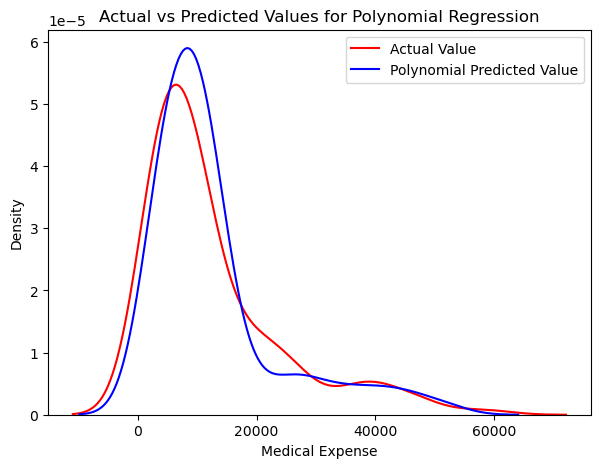

MAE: 2967.9092729906542
MSE: 24507533.3914218
RMSE: 4950.508397268082
R2 Score: 0.822186163611969


In [872]:
# Set the size of the figure
matplot.figure(figsize=(7, 5))
# Plot the actual values
ax1 = seaborn.kdeplot(y_test, color='r', label='Actual Value')
# Overlay the predicted values on the same plot
seaborn.kdeplot(y_pred, color='b', label='Polynomial Predicted Value', ax=ax1)
# Set the title and labels
matplot.title('Actual vs Predicted Values for Polynomial Regression')
matplot.xlabel('Medical Expense')

# Display the plot
matplot.title('Actual vs Predicted Values for Polynomial Regression')
matplot.xlabel('Medical Expense')
matplot.legend()
matplot.show()
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', numpy.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

## Decision Tree Model 

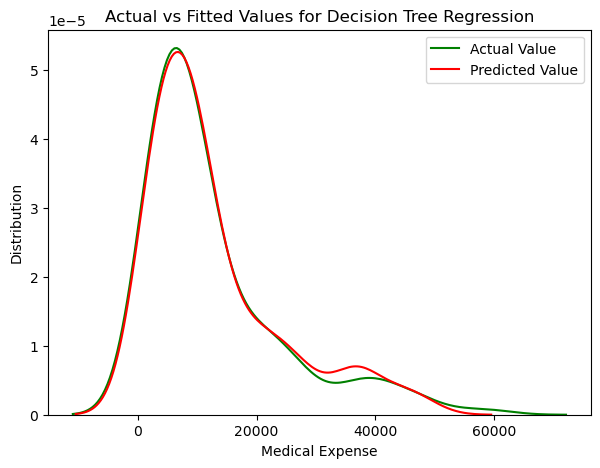

MAE: 3360.865225046729
MSE: 48097949.276105635
RMSE: 6935.268507859349
R2 Score: 0.6510264518837776


In [873]:
#distribution plot of actual and predicted values
matplot.figure(figsize=(7,5))
ax1 = seaborn.kdeplot(y_test, color="green", label="Actual Value")
seaborn.kdeplot(dtree_pred, color="red", label="Predicted Value" , ax=ax1)
matplot.title('Actual vs Fitted Values for Decision Tree Regression')
matplot.xlabel('Medical Expense')
matplot.ylabel('Distribution')
matplot.legend()
matplot.show()

print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', numpy.sqrt(mean_squared_error(y_test, dtree_pred)))
print('R2 Score:', r2_score(y_test, dtree_pred))

## Random Forest Regressor 


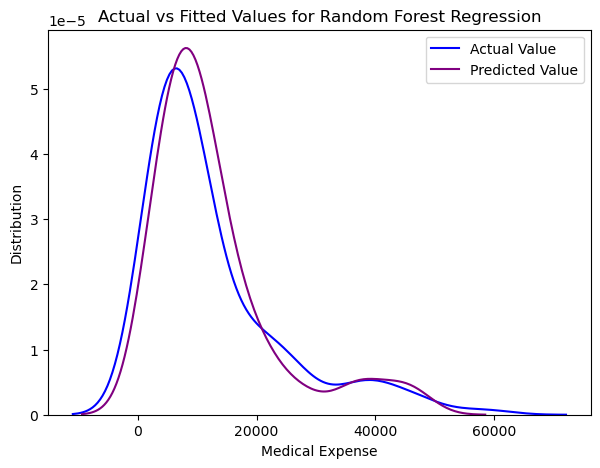

MAE: 2916.3011757588
MSE: 27234927.84776357
RMSE: 5218.709404418258
R2 Score: 0.8023976168055682


In [874]:
#distribution plot of actual and predicted values
matplot.figure(figsize=(7,5))
ax1 = seaborn.kdeplot(y_test, color="blue", label="Actual Value")
seaborn.kdeplot(rf_pred, color="purple", label="Predicted Value" , ax=ax1)
matplot.title('Actual vs Fitted Values for Random Forest Regression')
matplot.xlabel('Medical Expense')
matplot.ylabel('Distribution')
matplot.legend()
matplot.show()

print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', numpy.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 Score:', r2_score(y_test, rf_pred))


### The previous analysis concluded that the random forest regressor model had the best prediction value due to the low RMSE score. However, as you can see here, the polynomial model has a better RMSE score from these trainings. There is also a slightly better R^2 value for the polynomial model. Unless I have made some error, I should conclude that the polynomial model might lead to better predictions. However, as we discovered above, there were some errors in the previous analysis. One possible error is accidentally using test data from one test train split for summary statistics for another model. If this was an important project, I would be careful to run each summary directly after the test train split, to make sure that the conclusions are not impacted. 
## Overall this was a great project to learn about the power of python libraries and machine learning to analyze complex data. 

In [877]:
# Suppose I had a sample individual:
sample_individual = df.loc[[1]]

# Drop the 'charges' column
sample_individual = sample_individual.drop(columns=['charges'])

# Ensure it has the same columns (features) as used during training
print(sample_individual)


sample_individual_poly = poly_reg.transform(sample_individual)
predicted_value = plr.predict(sample_individual_poly)

print("Predicted value for the sample individual:", predicted_value[0])


   age  sex    bmi  children  smoker  region
1   18    1  33.77         1       0       0
Predicted value for the sample individual: 2876.0078125
